In [2]:
pwd


'/mnt/azmnt/code/Users'

In [3]:
ls

Calibration prediction-SVR model-Copy1.ipynb*  priyanka.dolli/
Calibration prediction-SVR model.ipynb*        Ravi_Cal_Result.csv*
Cal_Result.csv*                                Sample_for_calibration.ipynb*
Logistic regression- Calibration .ipynb*       Slope and ratio.ipynb*
Mark2.csv*                                     Untitled2.ipynb*
ML for Calibration calculation.ipynb*          Untitled.ipynb*
plots.ipynb*


In [4]:
import pandas as pd
import numpy as np

In [5]:
datasets= pd.read_csv('/mnt/azmnt/code/Users/Mark2.csv', index_col = 0) 
datasets.head()


,SERIAL_NUMBER,COUNTRY_NAME,MODULE_CODE,ACCEPTABLE_CV_HIGH,LOW_CAL_DEV_TARGET,RATIO,ACCEPTABLE_CV_LOW,ACTIONOPERATIONTASK_ID,CALIBRATIONSTATUS,CALIBRATOR_LOT,...,PACK_SPECIFIC,PRIMARY_PACK_ID,REAGENTLOTNUMBER,RESULT,SLOPE_RANGE,STATE,SYNCID,TDEF_VERSION,TEST_ID,UNIT
MATERIAL_NUMBER,,,,,,,,,,,,,,,,,,,,,
11066001,IM00161,United States,IA,9.4,-0.3,3,7.6,2149758240,New,CA01,...,0,P00318915001612,189,Valid,0.33 - 4.07,New,789,1.1,78,ug/dL
11066001,IM00152,United States,IA,8.7,0.1,2,7.3,2335469082,New,CA01,...,1,P00420912008738,209,Valid,0.33 - 4.07,New,673,1.1,71,ng/mL
11066001,IM00246,United States,IA,7.0,-0.4,3,6.6,2286255385,New,CA01,...,0,P11311305064124,113,Valid,0.345 - 4.255,New,636,1.2,73,ng/dL
11066000,IH00687,United States,IA,8.7,0.1,2,7.3,2144856930,New,CA01,...,1,P00420512001280,205,Valid,0.33 - 4.07,New,109,1.1,205,ng/dL
11066000,IH00127,United States,IA,7.0,-0.4,3,6.6,2124064538,New,CA01,...,1,P11310805003034,108,Valid,0.345 - 4.255,New,290,1.2,272,ng/dL


In [6]:
import pandas as pd
from pandas import Series,DataFrame

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
datasets.iloc[:1603]


,SERIAL_NUMBER,COUNTRY_NAME,MODULE_CODE,ACCEPTABLE_CV_HIGH,LOW_CAL_DEV_TARGET,RATIO,ACCEPTABLE_CV_LOW,ACTIONOPERATIONTASK_ID,CALIBRATIONSTATUS,CALIBRATOR_LOT,...,PACK_SPECIFIC,PRIMARY_PACK_ID,REAGENTLOTNUMBER,RESULT,SLOPE_RANGE,STATE,SYNCID,TDEF_VERSION,TEST_ID,UNIT
MATERIAL_NUMBER,,,,,,,,,,,,,,,,,,,,,
11066001,IM00161,United States,IA,9.4,-0.3,3,7.6,2149758240,New,CA01,...,0,P00318915001612,189,Valid,0.33 - 4.07,New,789,1.1,78,ug/dL
11066001,IM00152,United States,IA,8.7,0.1,2,7.3,2335469082,New,CA01,...,1,P00420912008738,209,Valid,0.33 - 4.07,New,673,1.1,71,ng/mL
11066001,IM00246,United States,IA,7.0,-0.4,3,6.6,2286255385,New,CA01,...,0,P11311305064124,113,Valid,0.345 - 4.255,New,636,1.2,73,ng/dL
11066000,IH00687,United States,IA,8.7,0.1,2,7.3,2144856930,New,CA01,...,1,P00420512001280,205,Valid,0.33 - 4.07,New,109,1.1,205,ng/dL
11066000,IH00127,United States,IA,7.0,-0.4,3,6.6,2124064538,New,CA01,...,1,P11310805003034,108,Valid,0.345 - 4.255,New,290,1.2,272,ng/dL
11066000,IH00645,United States,IA,7.0,-0.4,3,6.6,2298550933,New,CA01,...,0,P11311305077572,113,Valid,0.345 - 4.255,New,198,1.2,206,ng/dL
11066000,IH00147,United States,IA,9.4,-0.3,3,7.6,2178307069,New,CA01,...,1,P00319315002894,193,Valid,0.33 - 4.07,New,1356,1.1,151,ug/dL
11066000,IH00638,United States,IA,8.7,0.1,2,7.3,2292081516,New,CA01,...,1,P00420912010637,209,Valid,0.33 - 4.07,New,446,1.1,350,ng/mL
11066001,IM00246,United States,IA,7.0,-0.4,3,6.6,2286246659,New,CA01,...,0,P11311305064124,113,Valid,0.345 - 4.255,New,635,1.2,73,ng/dL


In [9]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 11066001 to 11066001
Data columns (total 54 columns):
SERIAL_NUMBER                    1064 non-null object
COUNTRY_NAME                     1064 non-null object
MODULE_CODE                      1064 non-null object
ACCEPTABLE_CV_HIGH               1064 non-null float64
LOW_CAL_DEV_TARGET               1064 non-null float64
RATIO                            1064 non-null int64
ACCEPTABLE_CV_LOW                1064 non-null float64
ACTIONOPERATIONTASK_ID           1064 non-null int64
CALIBRATIONSTATUS                1064 non-null object
CALIBRATOR_LOT                   1064 non-null object
CALID                            1064 non-null int64
CAL_NAME                         1064 non-null object
CHECKSUM                         1064 non-null int64
CREATED_DATE                     1064 non-null object
CURVE_SLOPE                      1064 non-null int64
DATA_POINT_CONCENTRATION_HIGH    1064 non-null float64
DATA_POINT_CONCENTR

In [10]:
from sklearn.svm import SVC,SVR
##from sklearn import svm

In [11]:
##model = svm.SVC()  ##(kernel='linear')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
    datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 11066001 to 11066001
Data columns (total 54 columns):
SERIAL_NUMBER                    1064 non-null object
COUNTRY_NAME                     1064 non-null object
MODULE_CODE                      1064 non-null object
ACCEPTABLE_CV_HIGH               1064 non-null float64
LOW_CAL_DEV_TARGET               1064 non-null float64
RATIO                            1064 non-null int64
ACCEPTABLE_CV_LOW                1064 non-null float64
ACTIONOPERATIONTASK_ID           1064 non-null int64
CALIBRATIONSTATUS                1064 non-null object
CALIBRATOR_LOT                   1064 non-null object
CALID                            1064 non-null int64
CAL_NAME                         1064 non-null object
CHECKSUM                         1064 non-null int64
CREATED_DATE                     1064 non-null object
CURVE_SLOPE                      1064 non-null int64
DATA_POINT_CONCENTRATION_HIGH    1064 non-null float64
DATA_POINT_CONCENTR

In [14]:
array = datasets.values

In [15]:
Y = array[:,14]
X = array[:,3:6]

In [16]:
print (X)
print(Y)

[[9.4 -0.3 3]
 [8.7 0.1 2]
 [7.0 -0.4 3]
 ...
 [8.7 0.1 2]
 [7.0 -0.4 3]
 [7.0 -0.4 3]]
[1 1 1 ... 1 1 1]


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [19]:
print (X_train)
print (Y_train)

[[7.0 -0.4 3]
 [9.4 -0.3 4]
 [7.0 -0.4 3]
 ...
 [8.6 -0.4 8]
 [7.0 -0.4 3]
 [7.0 -0.4 3]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1

In [20]:
X_train.shape

(851, 3)

In [21]:
Y_train.shape
##Y_train=Y_train.astype('int')

(851,)

In [22]:
X_test.shape

(213, 3)

In [23]:
Y_test.shape

(213,)

In [24]:
print (X_test)

[[8.7 0.1 2]
 [9.4 -0.3 2]
 [9.4 -0.3 3]
 [8.7 0.1 2]
 [9.4 -0.3 4]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [8.6 -0.4 9]
 [7.0 -0.4 3]
 [8.7 0.1 2]
 [8.6 -0.4 8]
 [8.6 -0.4 9]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [8.7 0.1 2]
 [9.4 -0.3 3]
 [7.0 -0.4 3]
 [8.7 0.1 2]
 [7.0 -0.4 3]
 [8.6 -0.4 10]
 [9.4 -0.3 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [9.4 -0.3 3]
 [9.4 -0.3 3]
 [9.4 -0.3 2]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [9.4 -0.3 3]
 [7.0 -0.4 3]
 [9.4 -0.3 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [9.4 -0.3 2]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [8.6 -0.4 5]
 [9.4 -0.3 3]
 [7.0 -0.4 3]
 [9.4 -0.3 3]
 [8.6 -0.4 8]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [8.7 0.1 2]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [8.6 -0.4 9]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [9.4 -0.3 4]
 [8.7 0.1 2]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [7.0 -0.4 3]
 [8.6 -0.4 9]
 [7.0 -0.4 3]
 [8.7 0.1 2]
 [8.6 -0.4 9]
 [9.4 -0.3 4]
 [7.0 -0.4 3]
 [9.4 -0.3 3]

In [25]:
##X_train_mod= X_train.reshape(-1,1)

In [26]:
##Y_train_mod= Y_train.reshape(-1,1)

In [27]:
##X_test_mod = X_test.reshape(-1,1)

In [28]:
##Y_test_mod = Y_test.reshape(-1,1)

In [29]:
##X_train_mod.shape

In [30]:
##Y_train_mod.shape

In [31]:
svc = SVR(gamma='auto')
svc.fit(X_train, Y_train)
##model.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
Y_pred = svc.predict(X_test)

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_absolute_error(Y_test,Y_pred)

0.14795156836924328

In [35]:
from sklearn.metrics import explained_variance_score

In [36]:
explained_variance_score(Y_test,Y_pred)

-0.01073099284287693

In [37]:
Xnew = [[7,-0.3,3]]
Ynew = svc.predict(Xnew)
print(Ynew)

[1.09645155]


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
Y= Y.reshape(-1,1)
Y=sc.fit_transform(Y)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [52]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=3))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [53]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [54]:
results=regressor.fit(X_train,Y_train)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
744/744 [==============================] - 2s 2ms/step - loss: 0.3805 - mean_absolute_error: 0.4210 - acc: 0.5524
Epoch 2/100
744/744 [==============================] - 0s 46us/step - loss: 0.1749 - mean_absolute_error: 0.3052 - acc: 0.6546
Epoch 3/100
744/744 [==============================] - 0s 40us/step - loss: 0.0852 - mean_absolute_error: 0.2439 - acc: 0.8347
Epoch 4/100
744/744 [==============================] - 0s 38us/step - loss: 0.0537 - mean_absolute_error: 0.2106 - acc: 0.9449
Epoch 5/100
744/744 [==============================] - 0s 41us/step - loss: 0.0393 - mean_absolute_error: 0.1830 - acc: 0.9449
Epoch 6/100
744/744 [==============================] - 0s 40us/step - loss: 0.0304 - mean_absolute_error: 0.1588 - acc: 0.9449
Epoch 7/100
744/744 [==============================] - 0s 37us/step - loss: 0.0241 - mean_absolute_error: 0.1369 - acc: 0.9449
Epoch 8/100
744/744 [==============================] - 0s 40us/s

744/744 [==============================] - 0s 36us/step - loss: 0.0071 - mean_absolute_error: 0.0356 - acc: 0.9449
Epoch 64/100
744/744 [==============================] - 0s 37us/step - loss: 0.0071 - mean_absolute_error: 0.0350 - acc: 0.9449
Epoch 65/100
744/744 [==============================] - 0s 40us/step - loss: 0.0071 - mean_absolute_error: 0.0325 - acc: 0.9449
Epoch 66/100
744/744 [==============================] - 0s 37us/step - loss: 0.0071 - mean_absolute_error: 0.0355 - acc: 0.9449
Epoch 67/100
744/744 [==============================] - 0s 38us/step - loss: 0.0071 - mean_absolute_error: 0.0323 - acc: 0.9449
Epoch 68/100
744/744 [==============================] - 0s 37us/step - loss: 0.0071 - mean_absolute_error: 0.0336 - acc: 0.9449
Epoch 69/100
744/744 [==============================] - 0s 41us/step - loss: 0.0071 - mean_absolute_error: 0.0375 - acc: 0.9449
Epoch 70/100
744/744 [==============================] - 0s 36us/step - loss: 0.0071 - mean_absolute_error: 0.0324 - a

In [61]:
Y_pred= regressor.predict(X_test)
print(Y_pred)

[-0.00327984  0.00480384  0.00480384  0.00480384  0.00480384  0.07055626
 -0.00327984 -0.00327984  0.06201294  0.00480384  0.00480384  0.00480384
  0.07055626  0.00480384  0.00480384  0.00480384  0.00480384  0.00719656
  0.00480384  0.06201294  0.00480384  0.07055626  0.00480384  0.00480384
 -0.00327984 -0.00327984  0.00480384  0.07055626  0.07055626  0.00480384
  0.00480384  0.07055626 -0.00327984  0.00719656  0.00480384  0.00480384
  0.00480384 -0.00327984  0.00480384  0.00719656  0.00480384  0.00480384
 -0.00327984  0.00480384  0.00480384  0.06201294 -0.00327984  0.00480384
  0.00480384  0.00480384  0.06201294  0.0755432  -0.00327984  0.00480384
  0.00480384  0.00480384  0.00480384  0.00480384  0.00480384 -0.00327984
  0.00719656  0.0157399   0.00480384  0.00480384  0.00480384  0.00480384
 -0.00327984  0.00480384  0.00480384  0.06201294  0.06201294 -0.00327984
  0.00480384 -0.00327984  0.00480384  0.00480384  0.07055626  0.07055626
  0.00480384  0.07055626  0.00480384 -0.00327984 -0

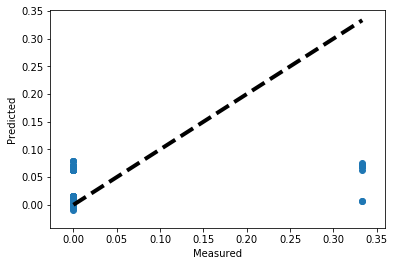

In [57]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()